# Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 



Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [131]:
import pandas as pd
import numpy as np

In [132]:
url='https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
df=pd.read_csv(url)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# checking null values

In [134]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [135]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df.dtypes


country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Encoding the dataframe

In [138]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [139]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=lc.fit_transform(df[i].values.reshape(-1,1))
df        

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [140]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0,NaN


In [141]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [142]:
df['other_fuel3']=df['other_fuel3'].fillna(np.mean(df['other_fuel3']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [143]:
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [144]:
df['wepp_id']=df['wepp_id'].fillna(np.median(df['wepp_id']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [145]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(np.mean(df['year_of_capacity_data']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,1,NaN


In [146]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(np.mean(df['generation_gwh_2013']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,NaN,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,NaN,NaN,NaN,NaN,1,NaN


In [147]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(np.mean(df['generation_gwh_2014']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,NaN,NaN,NaN,1,NaN


In [148]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,NaN,NaN,1,NaN


In [149]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,NaN,1,NaN


In [150]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN


In [151]:
df['estimated_generation_gwh']=df['estimated_generation_gwh'].fillna(np.mean(df['estimated_generation_gwh']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN


In [152]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [153]:
df['other_fuel3']=df['other_fuel3'].fillna(np.median(df['other_fuel3']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,903,494,1600.0,16.2949,77.3568,1,2,1,...,2,NaN,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0,NaN
904,0,0,904,823,3.0,12.8932,78.1654,6,3,1,...,0,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
905,0,0,905,892,25.5,15.2758,75.5811,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
906,0,0,906,540,80.0,24.3500,73.7477,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN


In [154]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [155]:
df.drop('other_fuel3',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN


In [156]:
df.drop('wepp_id',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0,NaN


In [157]:
df.drop('estimated_generation_gwh',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,2.5,28.1839,73.2407,6,3,1,...,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,0,0,1,520,98.0,24.7663,74.6090,1,3,1,...,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,0,0,2,854,39.2,21.9038,69.3732,7,3,1,...,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


In [158]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [159]:
df.dtypes

country                     int64
country_long                int64
name                        int64
gppd_idnr                   int64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
other_fuel1                 int64
other_fuel2                 int64
commissioning_year        float64
owner                       int64
source                      int64
url                         int64
geolocation_source          int64
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int64
dtype: object

# Visualization of Data

In [160]:
import seaborn as sns

<AxesSubplot:xlabel='country', ylabel='Density'>

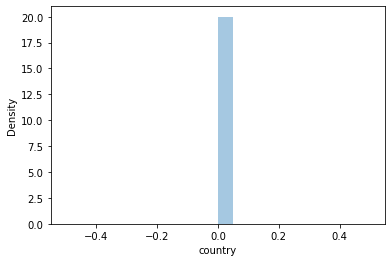

In [161]:
sns.distplot(df['country'],kde=True,bins=20)

<AxesSubplot:xlabel='country_long', ylabel='Density'>

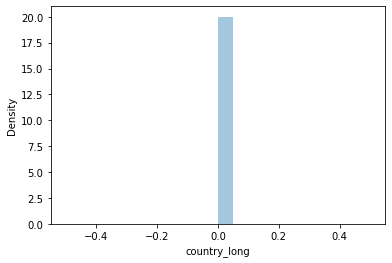

In [162]:
sns.distplot(df['country_long'],kde=True,bins=20)

<AxesSubplot:xlabel='name', ylabel='Density'>

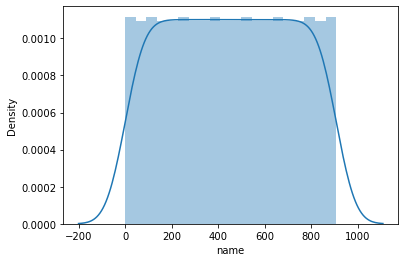

In [163]:
sns.distplot(df['name'],kde=True,bins=20)

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

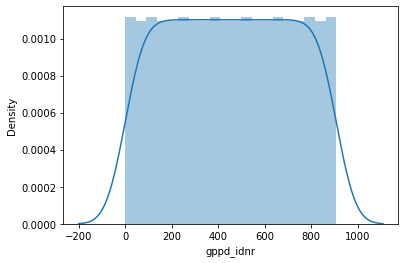

In [164]:
sns.distplot(df['gppd_idnr'],kde=True,bins=20)

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

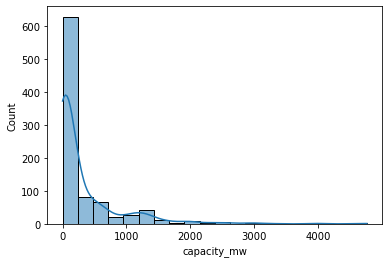

In [165]:
sns.histplot(x='capacity_mw',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='latitude', ylabel='Count'>

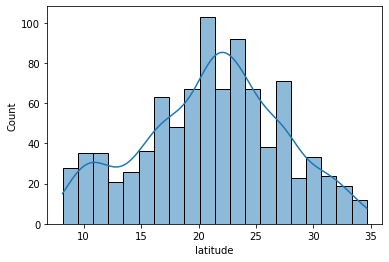

In [166]:
sns.histplot(x='latitude',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='longitude', ylabel='Count'>

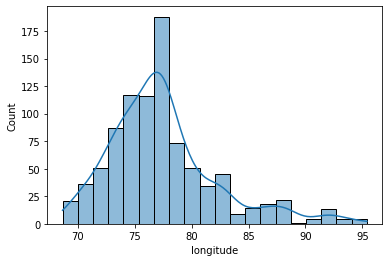

In [167]:
sns.histplot(x='longitude',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

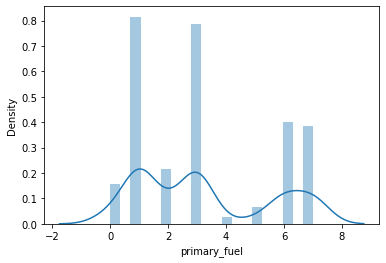

In [168]:
sns.distplot(df['primary_fuel'],kde=True,bins=20)

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

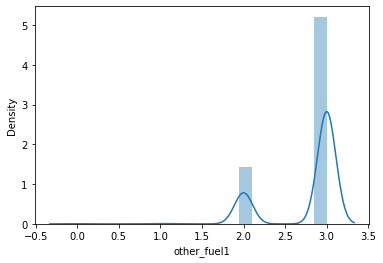

In [169]:
sns.distplot(df['other_fuel1'],kde=True,bins=20)

<AxesSubplot:xlabel='other_fuel2', ylabel='Density'>

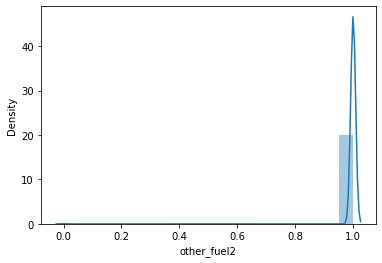

In [170]:
sns.distplot(df['other_fuel2'],kde=True,bins=20)

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

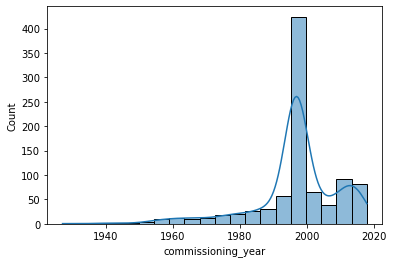

In [171]:
sns.histplot(x='commissioning_year',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='owner', ylabel='Density'>

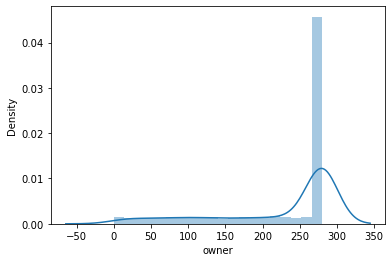

In [172]:
sns.distplot(df['owner'],kde=True,bins=20)

<AxesSubplot:xlabel='source', ylabel='Density'>

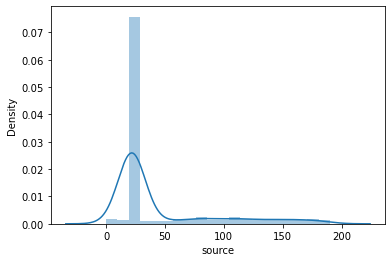

In [173]:
sns.distplot(df['source'],kde=True,bins=20)

<AxesSubplot:xlabel='url', ylabel='Density'>

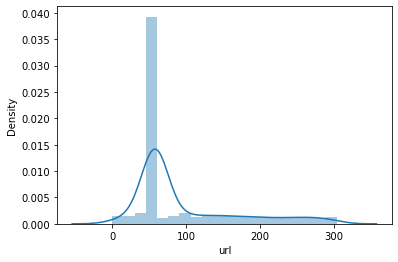

In [174]:
sns.distplot(df['url'],kde=True,bins=20)

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

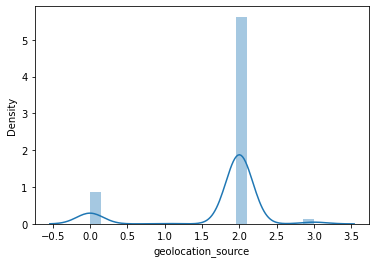

In [175]:
sns.distplot(df['geolocation_source'],kde=True,bins=20)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Count'>

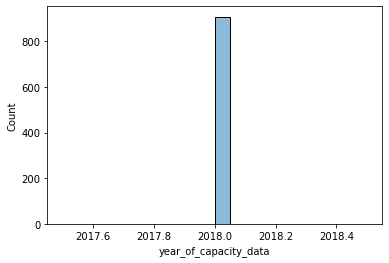

In [176]:
sns.histplot(x='year_of_capacity_data',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Count'>

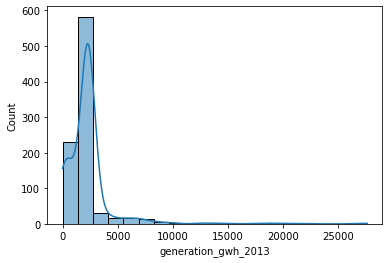

In [177]:
sns.histplot(x='generation_gwh_2013',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

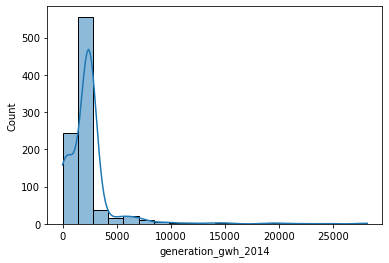

In [178]:
sns.histplot(x='generation_gwh_2014',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

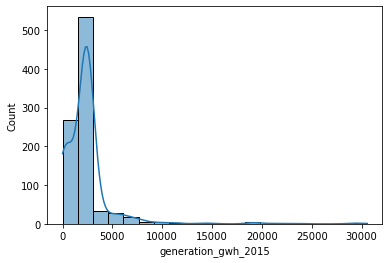

In [179]:
sns.histplot(x='generation_gwh_2015',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

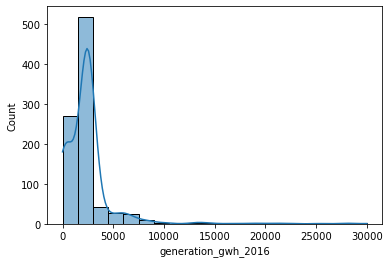

In [180]:
sns.histplot(x='generation_gwh_2016',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

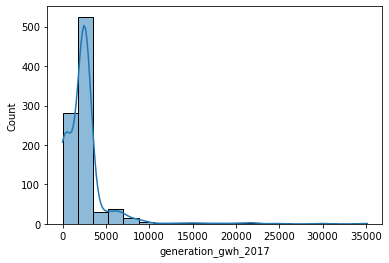

In [181]:
sns.histplot(x='generation_gwh_2017',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

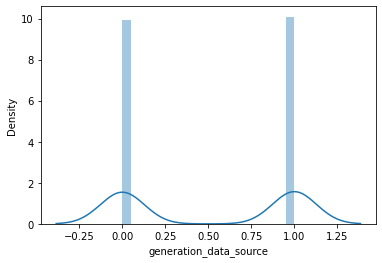

In [182]:
sns.distplot(df['generation_data_source'],kde=True,bins=20)

# Describing dataset

In [183]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.0,0.0,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,2.776432,0.998899,...,43.823789,94.429515,1.754405,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.504405
std,0.0,0.0,262.26132,262.26132,580.221767,6.088110,4.781201,2.281339,0.429886,0.033186,...,44.624092,70.352824,0.699844,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.500256
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.75000,226.75000,16.837500,17.057825,74.390250,1.000000,3.000000,1.000000,...,22.000000,58.000000,2.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.000000
50%,0.0,0.0,453.50000,453.50000,60.000000,21.278850,76.978950,3.000000,3.000000,1.000000,...,22.000000,58.000000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.000000
75%,0.0,0.0,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,3.000000,1.000000,...,29.250000,115.250000,2.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.000000
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,...,190.000000,303.000000,3.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


In [184]:
import matplotlib.pyplot as plt

<AxesSubplot:>

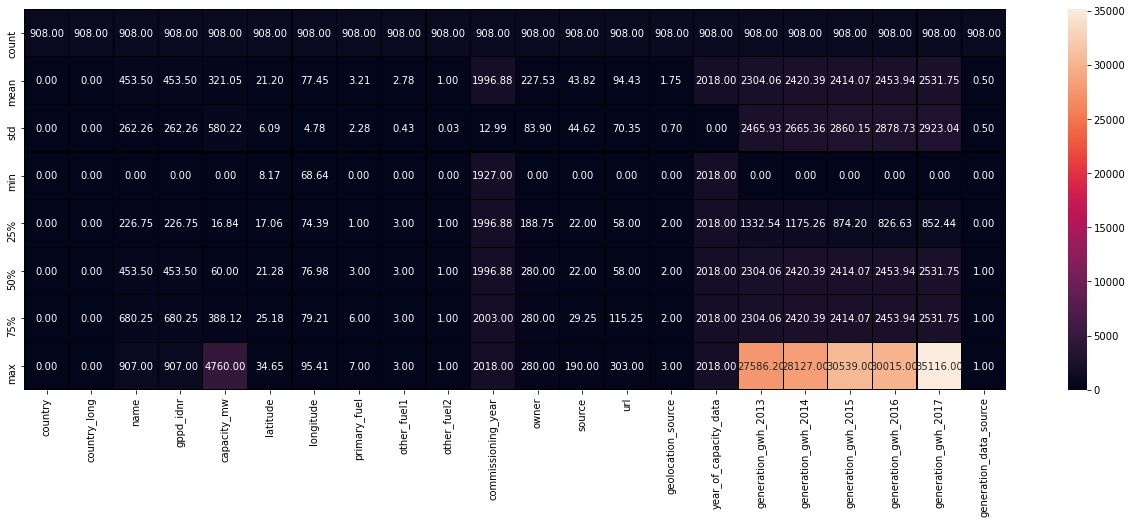

In [185]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidth=0.1,fmt='0.2f')

In [186]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.133707,0.018649,0.038752,-0.037293,-0.045414,...,-1.380057e-02,4.271063e-02,4.524166e-02,NaN,8.269905e-02,8.491457e-02,7.514018e-02,6.780015e-02,7.526164e-02,-4.176596e-03
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.105932,-0.380290,0.607373,0.367919,0.001330,...,4.165747e-01,5.969943e-01,-4.104067e-01,NaN,4.418679e-02,4.539080e-02,3.996483e-02,2.794672e-02,2.407891e-02,7.357951e-01
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.049790,0.197124,-0.377783,-0.598462,0.003495,...,-2.417009e-01,-2.431764e-01,1.832864e-01,NaN,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01,-4.946943e-01
latitude,NaN,NaN,-0.133707,-0.105932,0.049790,1.000000,0.031501,-0.013453,-0.038138,0.032809,...,5.594280e-02,-1.306189e-01,-1.779492e-01,NaN,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02,-8.641987e-02
longitude,NaN,NaN,0.018649,-0.380290,0.197124,0.031501,1.000000,-0.348710,-0.278016,0.005459,...,-2.390075e-01,-3.030540e-01,2.441165e-01,NaN,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02,-4.086751e-01
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.013453,-0.348710,1.000000,0.477575,0.032125,...,5.360860e-02,5.893477e-01,-4.199115e-01,NaN,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01,4.817582e-01
other_fuel1,NaN,NaN,-0.037293,0.367919,-0.598462,-0.038138,-0.278016,0.477575,1.000000,0.214570,...,2.546220e-01,2.695920e-01,-1.827059e-01,NaN,-3.219294e-01,-3.368479e-01,-3.326770e-01,-3.500029e-01,-3.619015e-01,5.249553e-01
other_fuel2,NaN,NaN,-0.045414,0.001330,0.003495,0.032809,0.005459,0.032125,0.214570,1.000000,...,1.624787e-02,1.720313e-02,-1.165878e-02,NaN,3.708755e-03,4.313804e-03,4.470583e-03,9.959178e-03,1.115060e-02,3.349831e-02


In [187]:
df.drop('country',inplace=True,axis=1)

In [188]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,658,2.5,28.1839,73.2407,6,3,1,2011.000000,...,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,0,1,520,98.0,24.7663,74.6090,1,3,1,1996.876894,...,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,0,2,854,39.2,21.9038,69.3732,7,3,1,1996.876894,...,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,...,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,...,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,903,494,1600.0,16.2949,77.3568,1,2,1,2016.000000,...,22,58,2,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,0,904,823,3.0,12.8932,78.1654,6,3,1,1996.876894,...,77,22,0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,0,905,892,25.5,15.2758,75.5811,7,3,1,1996.876894,...,21,260,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,0,906,540,80.0,24.3500,73.7477,1,3,1,1996.876894,...,59,82,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [189]:
df.drop('country_long',inplace=True,axis=1)

In [190]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,1,520,98.0,24.7663,74.6090,1,3,1,1996.876894,258,174,173,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,2,854,39.2,21.9038,69.3732,7,3,1,1996.876894,2,21,205,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,1,1996.876894,114,77,22,0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,905,892,25.5,15.2758,75.5811,7,3,1,1996.876894,280,21,260,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,906,540,80.0,24.3500,73.7477,1,3,1,1996.876894,91,59,82,2,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [191]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [192]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,1,520,98.0,24.7663,74.6090,1,3,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,2,854,39.2,21.9038,69.3732,7,3,1,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,1,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,905,892,25.5,15.2758,75.5811,7,3,1,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,906,540,80.0,24.3500,73.7477,1,3,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [193]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
name,1.000000,0.336792,0.059870,-0.133707,0.018649,0.038752,-0.037293,-0.045414,-0.041884,1.167146e-01,-1.380057e-02,4.271063e-02,4.524166e-02,8.269905e-02,8.491457e-02,7.514018e-02,6.780015e-02,7.526164e-02,-4.176596e-03
gppd_idnr,0.336792,1.000000,-0.334308,-0.105932,-0.380290,0.607373,0.367919,0.001330,0.041601,-6.021076e-01,4.165747e-01,5.969943e-01,-4.104067e-01,4.418679e-02,4.539080e-02,3.996483e-02,2.794672e-02,2.407891e-02,7.357951e-01
capacity_mw,0.059870,-0.334308,1.000000,0.049790,0.197124,-0.377783,-0.598462,0.003495,0.265827,3.036718e-01,-2.417009e-01,-2.431764e-01,1.832864e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01,-4.946943e-01
latitude,-0.133707,-0.105932,0.049790,1.000000,0.031501,-0.013453,-0.038138,0.032809,0.095050,7.033301e-03,5.594280e-02,-1.306189e-01,-1.779492e-01,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02,-8.641987e-02
longitude,0.018649,-0.380290,0.197124,0.031501,1.000000,-0.348710,-0.278016,0.005459,0.086054,2.778876e-01,-2.390075e-01,-3.030540e-01,2.441165e-01,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02,-4.086751e-01
primary_fuel,0.038752,0.607373,-0.377783,-0.013453,-0.348710,1.000000,0.477575,0.032125,-0.123060,-2.601736e-01,5.360860e-02,5.893477e-01,-4.199115e-01,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01,4.817582e-01
other_fuel1,-0.037293,0.367919,-0.598462,-0.038138,-0.278016,0.477575,1.000000,0.214570,-0.312623,-3.255902e-01,2.546220e-01,2.695920e-01,-1.827059e-01,-3.219294e-01,-3.368479e-01,-3.326770e-01,-3.500029e-01,-3.619015e-01,5.249553e-01
other_fuel2,-0.045414,0.001330,0.003495,0.032809,0.005459,0.032125,0.214570,1.000000,-0.005428,-2.077647e-02,1.624787e-02,1.720313e-02,-1.165878e-02,3.708755e-03,4.313804e-03,4.470583e-03,9.959178e-03,1.115060e-02,3.349831e-02
commissioning_year,-0.041884,0.041601,0.265827,0.095050,0.086054,-0.123060,-0.312623,-0.005428,1.000000,-2.166954e-02,2.183213e-02,1.106422e-02,6.061649e-04,1.108482e-01,1.343054e-01,1.493040e-01,1.726976e-01,1.734004e-01,-9.674034e-02
owner,0.116715,-0.602108,0.303672,0.007033,0.277888,-0.260174,-0.325590,-0.020776,-0.021670,1.000000e+00,-2.438403e-01,-1.909603e-01,3.983410e-01,-4.798636e-17,-3.967998e-17,2.878648e-17,3.868733e-17,1.421944e-16,-6.202246e-01


<AxesSubplot:>

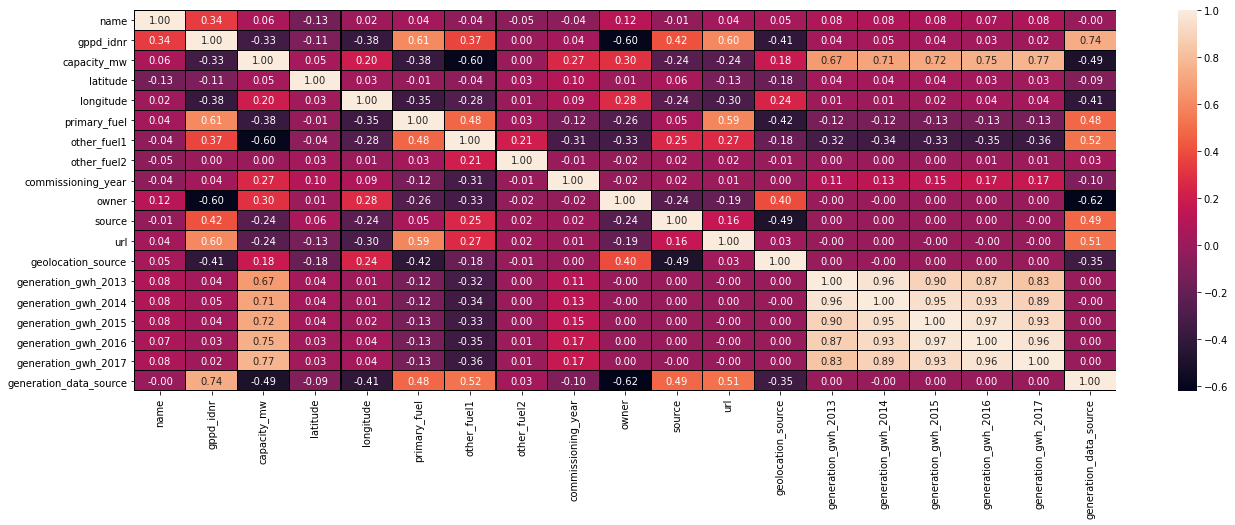

In [194]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),linewidth=0.1,linecolor='black',annot=True,fmt='0.2f')

# Outliers checking

In [195]:
df.skew()

name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.193257
latitude                  -0.147391
longitude                  1.129836
primary_fuel               0.471141
other_fuel1               -1.619441
other_fuel2              -30.133038
commissioning_year        -1.383330
owner                     -1.375607
source                     1.829145
url                        1.512258
geolocation_source        -1.922080
generation_gwh_2013        5.241491
generation_gwh_2014        5.041961
generation_gwh_2015        5.367370
generation_gwh_2016        5.071758
generation_gwh_2017        5.111938
generation_data_source    -0.017651
dtype: float64

-\+0.5 as the threshold

<AxesSubplot:>

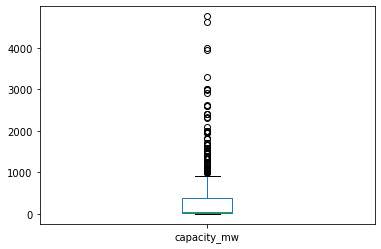

In [196]:
df['capacity_mw'].plot.box()

<AxesSubplot:>

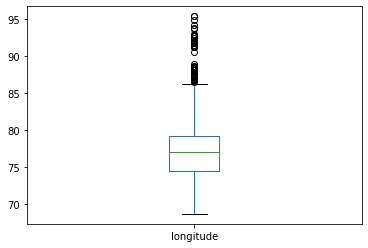

In [197]:
df['longitude'].plot.box()

<AxesSubplot:>

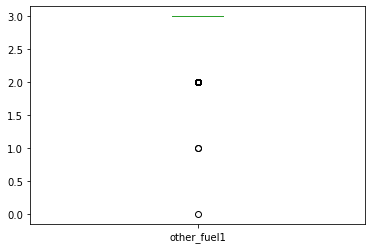

In [198]:
df['other_fuel1'].plot.box()

<AxesSubplot:>

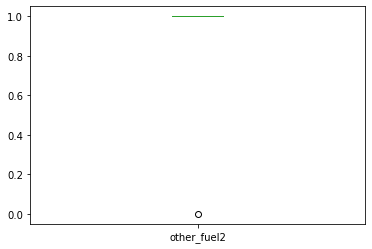

In [199]:
df['other_fuel2'].plot.box()

<AxesSubplot:>

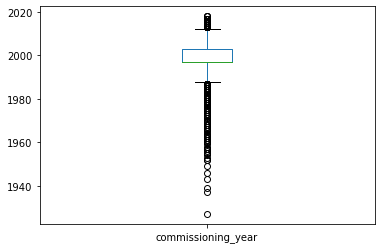

In [200]:
df['commissioning_year'].plot.box()

<AxesSubplot:>

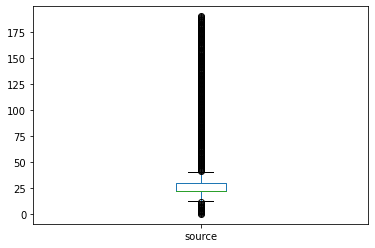

In [201]:
df['source'].plot.box()

<AxesSubplot:>

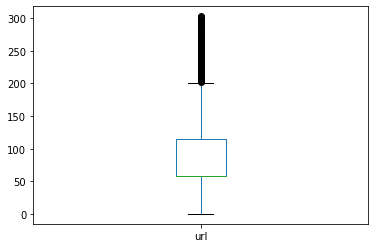

In [202]:
df['url'].plot.box()

<AxesSubplot:>

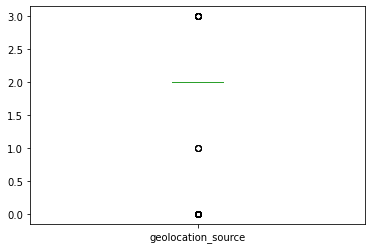

In [203]:
df['geolocation_source'].plot.box()

<AxesSubplot:>

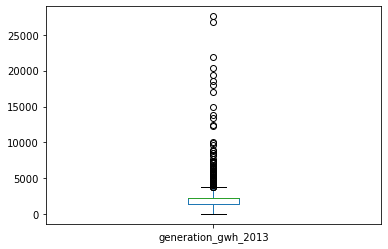

In [204]:
df['generation_gwh_2013'].plot.box()

<AxesSubplot:>

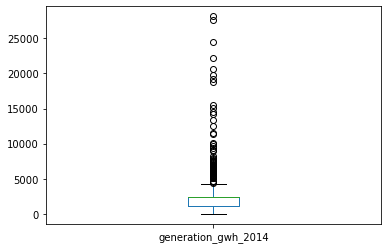

In [205]:
df['generation_gwh_2014'].plot.box()

<AxesSubplot:>

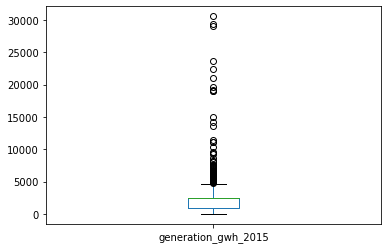

In [206]:
df['generation_gwh_2015'].plot.box()

<AxesSubplot:>

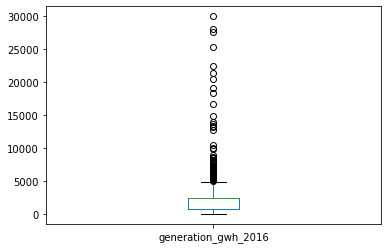

In [207]:
df['generation_gwh_2016'].plot.box()

<AxesSubplot:>

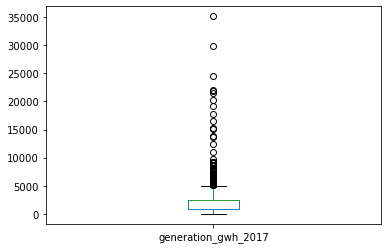

In [208]:
df['generation_gwh_2017'].plot.box()

# Outlier removal

In [209]:
df.shape

(908, 19)

In [210]:
from scipy.stats import zscore

In [211]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
        159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 222, 240, 245,
        300, 309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 343, 346,
        361, 364, 365, 365, 365, 365, 365, 365, 372, 376, 389, 417, 428,
        445, 455, 479, 483, 485, 494, 494, 494, 494, 494, 494, 495, 495,
        495, 495, 495, 495, 500, 520, 530, 533, 539, 542, 547, 575, 584,
        602, 622, 639, 649, 649, 649, 649, 649, 649, 658, 658, 658, 658,
        658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 707, 710, 722,
        722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727,
        727, 729, 787, 787, 787, 787, 787, 787, 789, 808, 809, 809, 809,
        809, 809, 812, 812, 814, 818, 819, 833, 848, 849, 849, 871, 872,
        880, 881, 881, 881, 881, 881, 881, 896, 901]),
 array([ 2, 15, 16, 17, 10, 10,  2, 13, 14, 15, 16, 17, 13, 14,  4,  4, 10,
         2, 13, 14, 15, 16, 17,  8,  4,  4, 10,  2, 13, 14, 15, 16

In [212]:
df_new=df[(z<3).all(axis=1)]
df_new

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,1,520,98.0,24.7663,74.6090,1,3,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,2,854,39.2,21.9038,69.3732,7,3,1,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,1,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,905,892,25.5,15.2758,75.5811,7,3,1,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,906,540,80.0,24.3500,73.7477,1,3,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [213]:
df_new.shape

(832, 19)

In [214]:
Data_loss=((908-832)/908)*100
Data_loss

8.370044052863436

# Separating Data in x and y

In [215]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

# Transforming Data to remove skewness

In [216]:
#x1=df_new.iloc[:,:-1]
#y1=df_new.iloc[:,-1]

In [217]:
from sklearn.preprocessing import power_transform

In [218]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.16563854,  0.79151775,  1.1576201 , ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [-2.14666836,  0.33280729,  0.57869844, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [-2.13039044,  1.39764072,  0.10056251, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       ...,
       [ 1.54843229,  1.5102347 , -0.97864674, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [ 1.55136394,  0.40129562,  0.50876248, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [ 1.55429466,  1.46595925, -1.81231315, ...,  0.31812958,
         0.31588978,  0.9912279 ]])

# Scaling the data

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.16563854,  0.79151775,  1.1576201 , ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [-2.14666836,  0.33280729,  0.57869844, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [-2.13039044,  1.39764072,  0.10056251, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       ...,
       [ 1.54843229,  1.5102347 , -0.97864674, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [ 1.55136394,  0.40129562,  0.50876248, ...,  0.31812958,
         0.31588978,  0.9912279 ],
       [ 1.55429466,  1.46595925, -1.81231315, ...,  0.31812958,
         0.31588978,  0.9912279 ]])

In [221]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [223]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')
          

At random state 0, the training accuracy is :- 0.7876760265935505
At random state 0,the training accuracy is :- 0.7424363373841779


At random state 1, the training accuracy is :- 0.7752802097944229
At random state 1,the training accuracy is :- 0.6919238772640204


At random state 2, the training accuracy is :- 0.7812481780514215
At random state 2,the training accuracy is :- 0.756375284861309


At random state 3, the training accuracy is :- 0.7985568926229754
At random state 3,the training accuracy is :- 0.6639955280397365


At random state 4, the training accuracy is :- 0.7851236927291657
At random state 4,the training accuracy is :- 0.7427373450860628


At random state 5, the training accuracy is :- 0.7619841562665202
At random state 5,the training accuracy is :- 0.8155829293846601


At random state 6, the training accuracy is :- 0.7853675772369214
At random state 6,the training accuracy is :- 0.7204138141362981


At random state 7, the training accuracy is :- 0.7757876708144964
At r

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [225]:
lr.fit(x_train,y_train)

LinearRegression()

In [226]:
pred_test=lr.predict(x_test)
pred_test

array([ 9.63203997e+01, -4.51206998e+01,  3.40548689e+02,  2.54584314e+03,
        4.49174394e+02,  9.81240856e+02,  7.46792183e+01,  1.36504014e+03,
        1.15440525e+03,  3.33546039e+02,  1.39396889e+03,  3.18644711e+01,
        1.23250588e+02,  6.61160321e+02,  2.23092711e+01,  1.19359874e+03,
        1.47445739e+03,  5.06323660e+02,  1.03747815e+02,  6.18535845e+01,
       -7.43431006e+00,  6.63109724e+01,  5.88023805e+01,  1.56173593e+03,
        1.47263940e+02,  2.18504215e+02,  4.22335204e+02, -1.55431825e+02,
        9.13208009e+01,  1.19656992e+02,  8.29371630e+00,  7.84719984e+01,
       -1.04754835e+00,  9.75612087e+01,  6.79745227e+01, -1.07039706e+02,
        3.78706769e+01,  8.35693930e+01,  3.13681976e+02,  5.45794616e+01,
       -1.60189370e+01,  1.38131490e+03,  8.94702489e+02,  5.06860550e+01,
        1.37030233e+03, -8.33117503e+00,  3.64911460e+02,  7.53817350e+01,
       -1.34340216e+02,  4.05959743e+02, -6.27661435e+01,  4.86280520e+02,
        6.66982259e+01,  

In [227]:
print(r2_score(y_test,pred_test))

0.830009591369785


# Cross Validation of the Model

In [228]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.7154827593422799 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369785


At cross fold 3 the cv score is 0.739346825153603 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369785


At cross fold 4 the cv score is 0.7389833076815918 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369785


At cross fold 5 the cv score is 0.7445448503095411 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369785


At cross fold 6 the cv score is 0.7432570501098091 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369785


At cross fold 7 the cv score is 0.745428924835159 and the accuracy score for training is -0.7474891292583101 and the accuracy score for testing is 0.830009591369

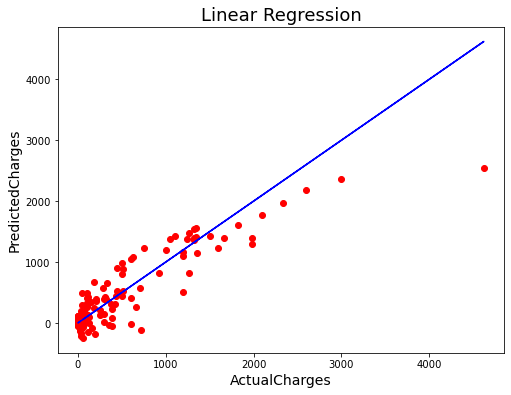

In [229]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('ActualCharges',fontsize=14)
plt.ylabel('PredictedCharges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [231]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [232]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls= ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8208742393638686

# Ensemble technique

In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [234]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 92.1985261758588
Cross Val Score : 84.81588144518095


# Saving the model

In [235]:
import pickle
filename='Global.db1'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [236]:
loaded_model=pickle.load(open('Global.db1','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.921985261758588


In [237]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,46.2395,8.659,655.7616,3680.5,374.7265,655.796,32.793,1085.24,1119.194,203.1093,...,20.9633,19.195,114.4745,81.9689,305.704,1600.512,44.666,301.4367,20.7754,45.631
Original,46.2395,8.659,655.7616,3680.5,374.7265,655.796,32.793,1085.24,1119.194,203.1093,...,20.9633,19.195,114.4745,81.9689,305.704,1600.512,44.666,301.4367,20.7754,45.631


# Now conditon with label=primary_fuel

In [238]:
features=df.drop('primary_fuel',axis=1)
target=df['primary_fuel']

In [239]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,1,520,98.0,24.7663,74.6090,1,3,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,2,854,39.2,21.9038,69.3732,7,3,1,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,1,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,905,892,25.5,15.2758,75.5811,7,3,1,1996.876894,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,906,540,80.0,24.3500,73.7477,1,3,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [240]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [241]:
import warnings
warnings.filterwarnings('ignore')

In [242]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f'At random state{i}, the training accuracy is :- {r2_score(target_train,pred_train)}')
    print(f'At random state{i}, the training accuracy is :- {r2_score(target_test,pred_test)}')
    print('\n')
    

At random state0, the training accuracy is :- 0.7932802609460937
At random state0, the training accuracy is :- 0.7461574985836482


At random state1, the training accuracy is :- 0.7778013505879747
At random state1, the training accuracy is :- 0.8103655107496279


At random state2, the training accuracy is :- 0.8007972069985174
At random state2, the training accuracy is :- 0.7106343621820456


At random state3, the training accuracy is :- 0.7752204170679379
At random state3, the training accuracy is :- 0.8112963883027547


At random state4, the training accuracy is :- 0.794171329343539
At random state4, the training accuracy is :- 0.7444080993944466


At random state5, the training accuracy is :- 0.7866280272537548
At random state5, the training accuracy is :- 0.7769442397186015


At random state6, the training accuracy is :- 0.7893543918147128
At random state6, the training accuracy is :- 0.7663023166900287


At random state7, the training accuracy is :- 0.7839429996937529
At random st

In [243]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=69)

In [244]:
lr.fit(features_train,target_train)

LinearRegression()

In [245]:
pred_test=lr.predict(features_test)
pred_test

array([ 2.38378682,  1.73974583,  1.61141681,  1.28128171,  0.93934815,
        6.13789822,  2.375929  ,  5.77025423,  2.80369165,  7.12413946,
        1.47676537,  5.97003231,  3.11236628,  2.5119527 ,  6.09859803,
        1.29550148,  4.89820431,  3.21682542,  2.80164139,  3.36511774,
        3.48812583,  1.66347597,  0.59766767,  0.94036157,  3.09467424,
        2.57456543,  5.95828437,  1.57496325,  2.83202805,  2.05387862,
        2.28995732,  5.00199439,  3.23661241,  2.86442255,  0.70294175,
        1.27111213,  2.56569793,  3.0280386 ,  6.19956308,  2.96877181,
        5.78427337,  6.69360329,  2.62969673,  2.78334819,  5.72430478,
        7.04221605,  3.13350646,  3.07307995,  2.69170566,  3.59077896,
        2.25086064,  3.47194758,  6.88910613,  1.53048781,  2.70313027,
        1.52444272,  1.15062518,  6.02561612,  3.2316707 ,  6.80009241,
        6.19257877,  1.44891813,  0.9152773 ,  6.33614072,  5.6833008 ,
        5.75567879,  7.2120719 ,  1.57762015,  6.72139411,  7.27

In [246]:
print(r2_score(target_test,pred_test))

0.8237416709067893


# Cross-Validation data

In [247]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.7046235826922416 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.8237416709067893


At cross fold 3 the cv score is 0.7533663194208761 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.8237416709067893


At cross fold 4 the cv score is 0.7614387608850886 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.8237416709067893


At cross fold 5 the cv score is 0.7553578197824621 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.8237416709067893


At cross fold 6 the cv score is 0.7586722378322343 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.8237416709067893


At cross fold 7 the cv score is 0.7640862577103554 and the accuracy score for training is -0.7170084126140468 and the accuracy score for testing is 0.82374

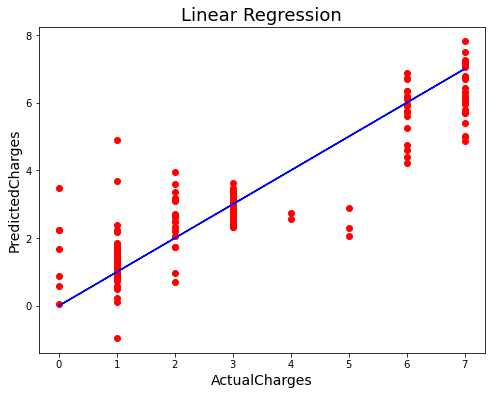

In [248]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='red')
plt.plot(target_test,target_test,color='b')
plt.xlabel('ActualCharges',fontsize=14)
plt.ylabel('PredictedCharges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [250]:
from sklearn.linear_model import Lasso 

parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [251]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls= ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.8237078257675793

In [252]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7553495590411609

# Ensemble technique

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [254]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)


rfs=r2_score(target_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)


R2 score : 96.56030017813447
Cross Val Score : 94.04183291095254


# Saving the model

In [255]:
import pickle
filename='Global.pk1'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:-

In [256]:
loaded_model=pickle.load(open('Global.pk1','rb'))
result=loaded_model.score(features_test,target_test)
print(result)

0.9656030017813446


In [257]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,1.02,1.12,0.82,1.0,1.0,6.0,2.83,6.99,2.83,6.99,...,1.0,1.11,5.91,6.0,6.99,0.31,1.03,1.11,2.37,1.0
Original,1.02,1.12,0.82,1.0,1.0,6.0,2.83,6.99,2.83,6.99,...,1.0,1.11,5.91,6.0,6.99,0.31,1.03,1.11,2.37,1.0
